In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gs
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


<h1><center>About Dataset</center></h1>
<h3>Context:</h3>
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

<h3>Content::</h3>
<p>Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:</p>
<ol>
<li>school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li>sex - student's sex (binary: 'F' - female or 'M' - male)</li>
<li>age - student's age (numeric: from 15 to 22)</li>
<li>address - student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li>Medu - mother's education (numeric: 0 - none, 1 - primary <li>education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li>Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li>Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li>Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li>reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li>guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li>traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li>studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<li>failures - number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li>schoolsup - extra educational support (binary: yes or no)</li>
<li>famsup - family educational support (binary: yes or no)</li>
<li>paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li>activities - extra-curricular activities (binary: yes or no)</li>
nursery - attended nursery school (binary: yes or no)</li>
<li>higher - wants to take higher education (binary: yes or no)</li>
<li>internet - Internet access at home (binary: yes or no)</li>
<li>romantic - with a romantic relationship (binary: yes or no)</li>
<li>famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li>freetime - free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li>goout - going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li>Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li>health - current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li>absences - number of school absences (numeric: from 0 to 93)</li>
<p>These grades are related with the course subject, Math or Portuguese:</p>

<li>G1 - first period grade (numeric: from 0 to 20)</li>
<li>G2 - second period grade (numeric: from 0 to 20)</li>
<li>G3 - final grade (numeric: from 0 to 20, output target)</li>
</ol>
<p>
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.</p>

<p>Source Information
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino</p>

<p>https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION</p>



In [145]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [146]:
data = pd.read_csv("student-por.csv")

In [130]:
target = pd.cut(x = df.G3, bins = [5,10,15,20], labels = ['Pass', 'Average', 'Excellent'])
df['Target'] = target
df.drop(['G1', 'G2', 'G3'], axis = 1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,Average
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,Average
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,Average


In [131]:
df.dropna(inplace = True)

In [132]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,16.712025,2.518987,2.322785,1.564873,1.943038,0.202532,3.930380,3.167722,3.181962,1.484177,2.264241,3.531646,3.738924
std,1.196660,1.134233,1.101901,0.750425,0.833100,0.568697,0.946205,1.047389,1.160683,0.902402,1.278167,1.446000,4.654109
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


In [133]:
cat = df.select_dtypes(include = ['object', 'category'])
num = df.select_dtypes(include = 'number')

cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Target
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,Average
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,Average
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no,Average
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes,Average
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no,Average


In [134]:
num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,4
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences')])

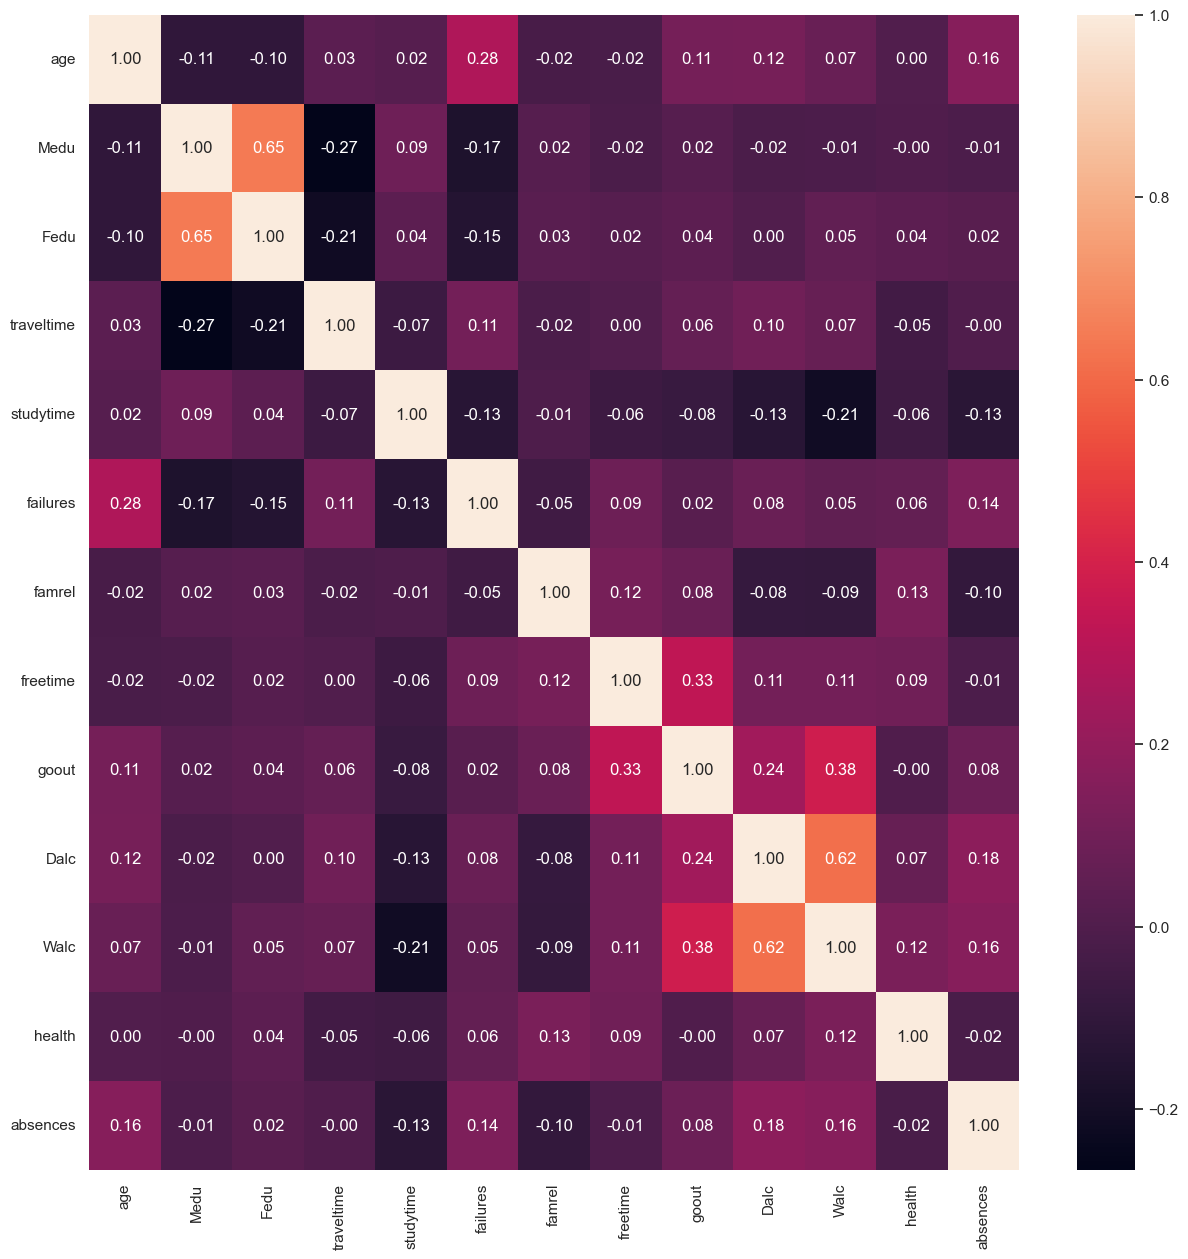

In [135]:
plt.figure(figsize=(15,15))
sns.heatmap(num.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

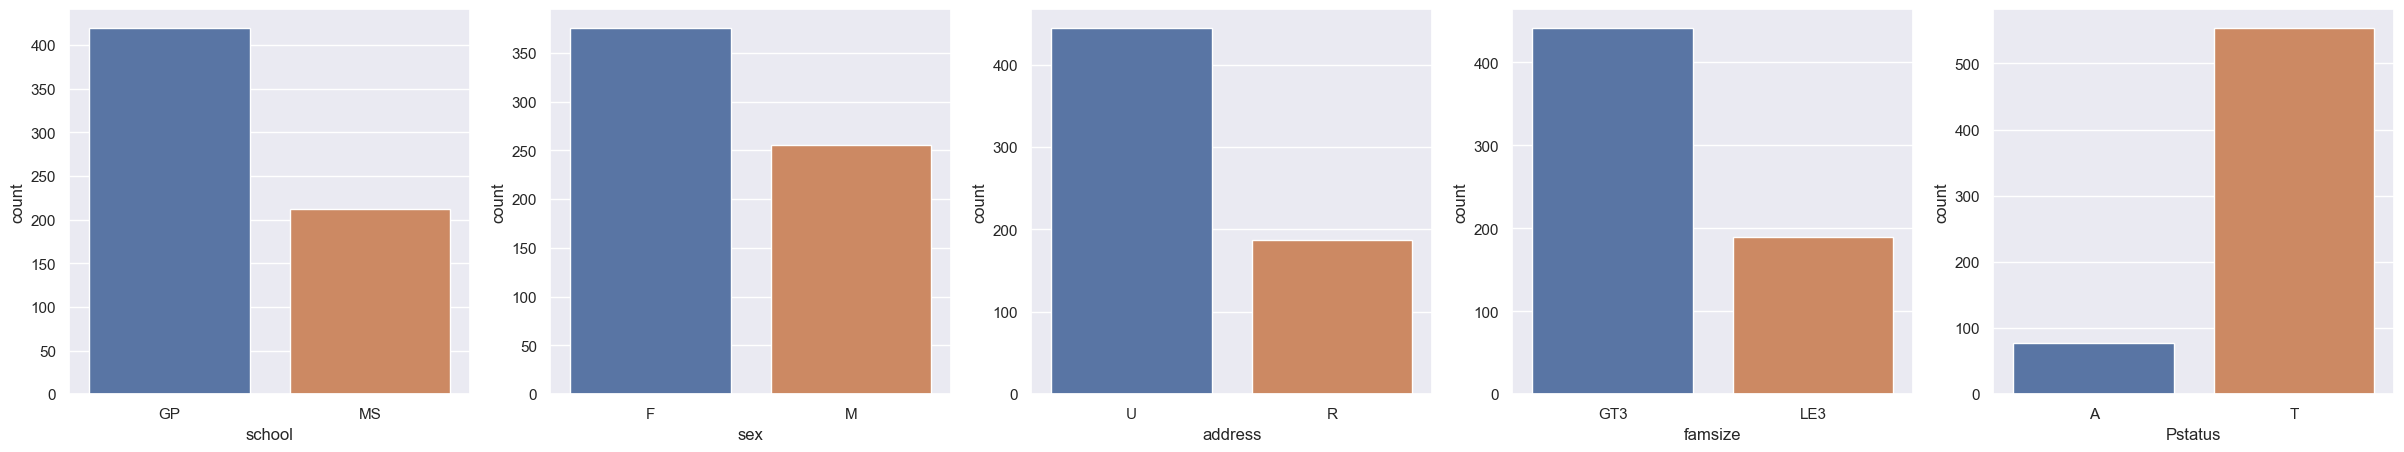

In [136]:

# Check For Linearity (regplot)
def relationship(dataframe, a, b, c, d, e):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 5, 1)
    sns.countplot(x = df[a])

    plt.subplot(1, 5, 2)
    sns.countplot(x = df[b])

    plt.subplot(1, 5, 3)
    sns.countplot(x = df[c])

    plt.subplot(1, 5, 4)
    sns.countplot(x = df[d])

    plt.subplot(1, 5, 5)
    sns.countplot(x = df[e])

relationship(data, 'school','sex','address','famsize','Pstatus')

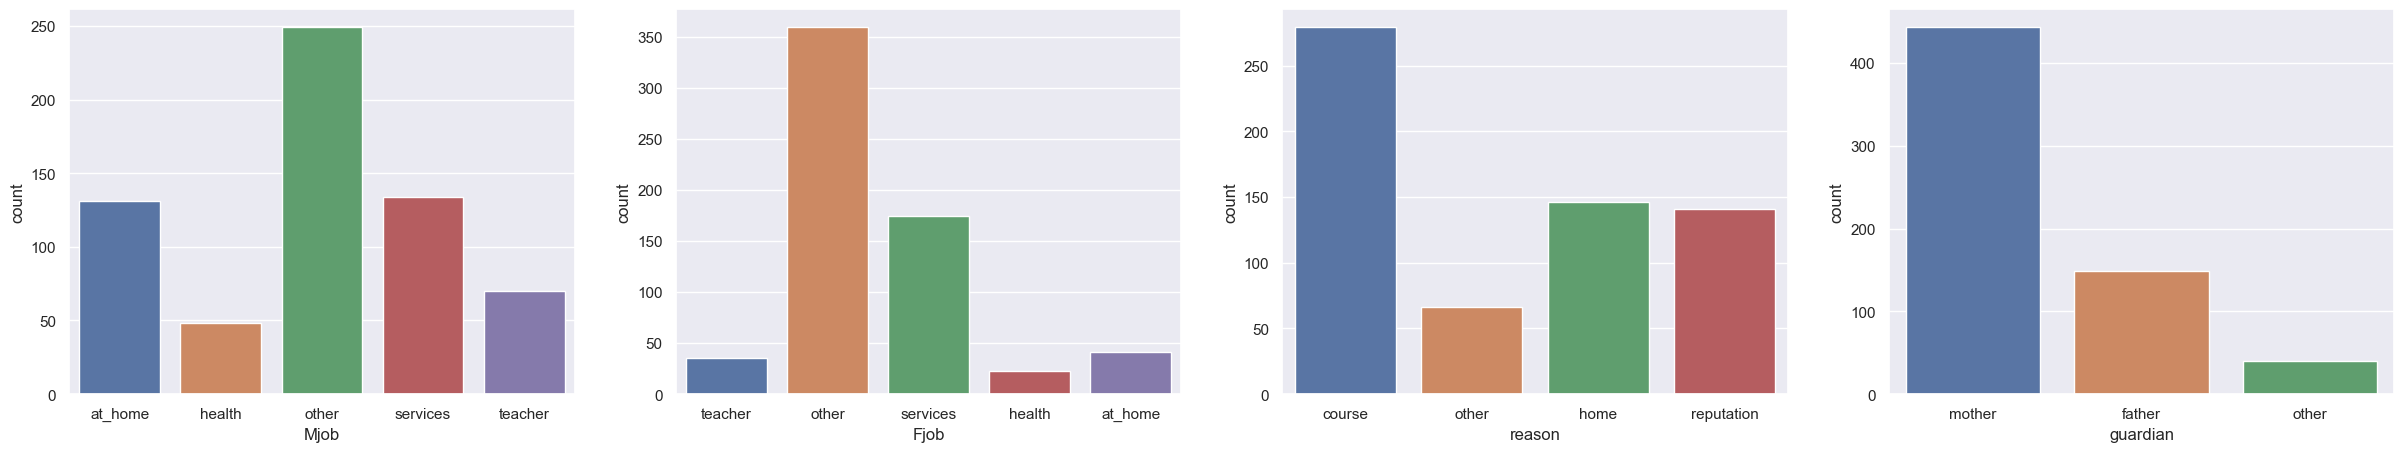

In [137]:
def relationship(dataframe, f, g, h ,i):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 4, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 4, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 4, 3)
    sns.countplot(x = df[h])

    plt.subplot(1, 4, 4)
    sns.countplot(x = df[i])


relationship(df,'Mjob','Fjob','reason','guardian')

<<ol>
<li>TMother's and father's work prevails "other"</li>
<li>More students chose the school because of the course of study, others because it was close to home, because of the school's reputation, and a minority for other reasons.</li>
<li>Most students are followed by their mother,few by their father, and other</ol>

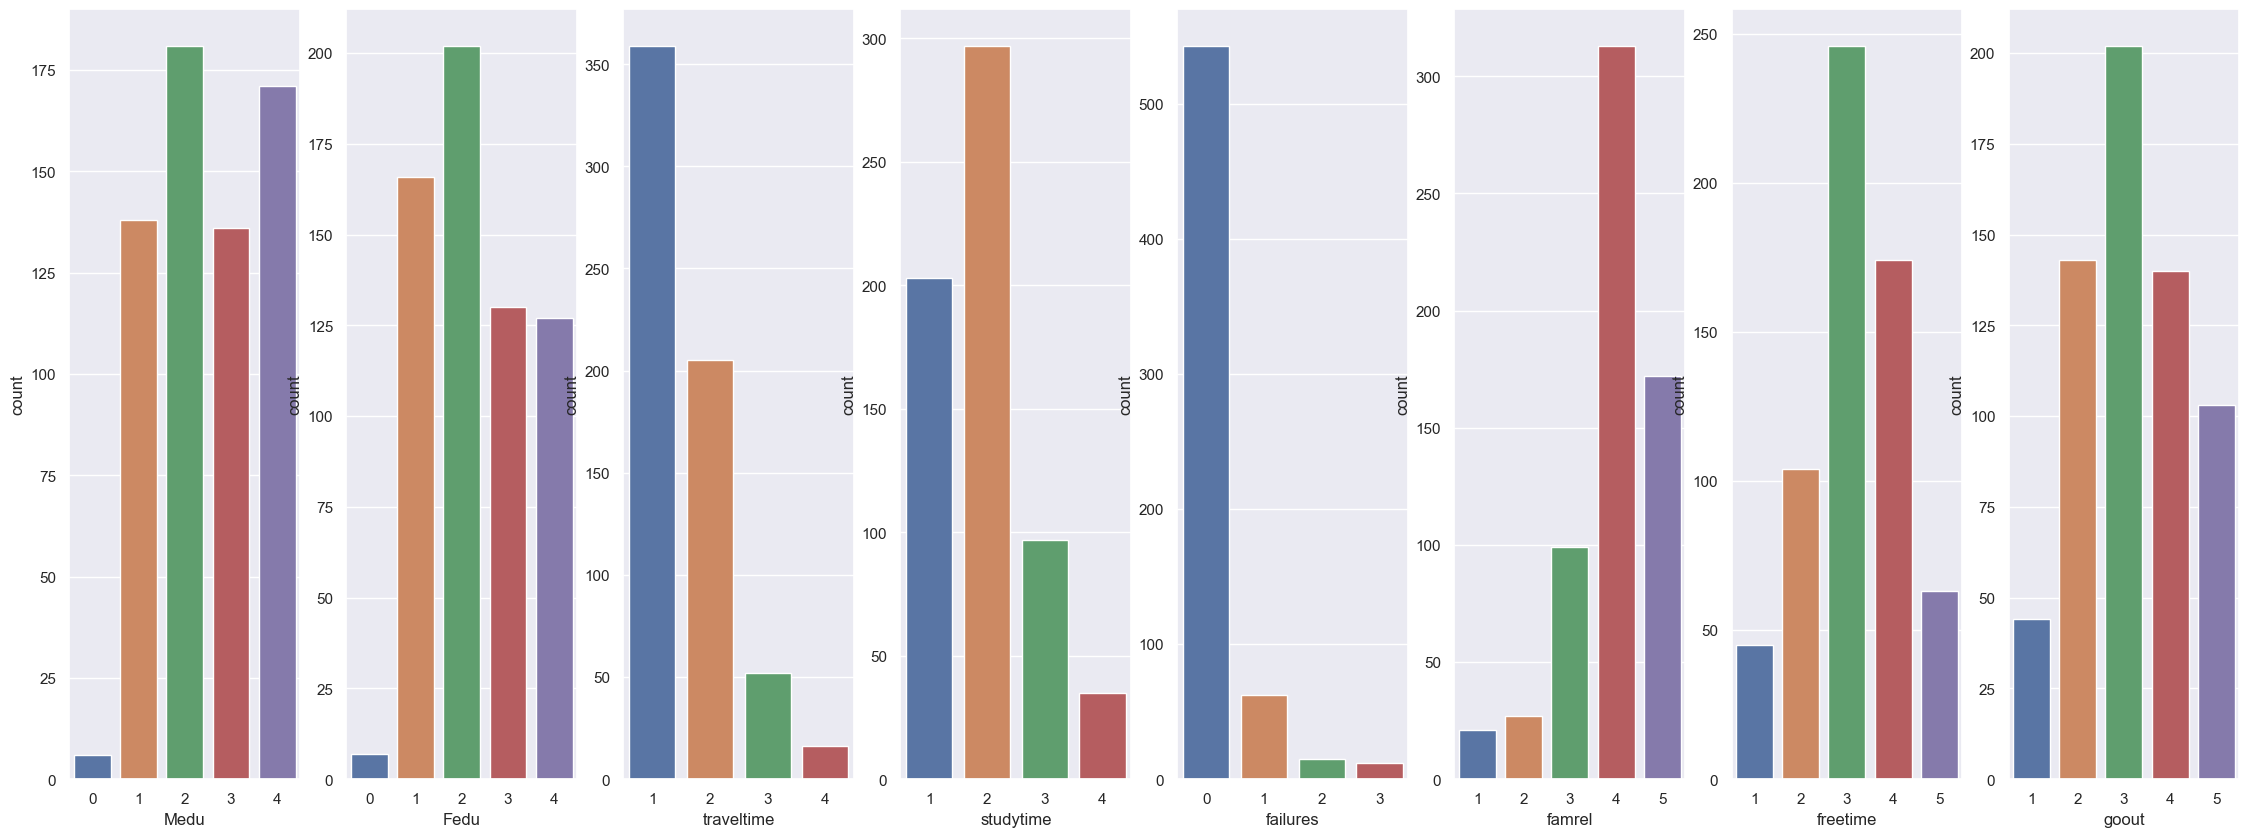

In [138]:
def relationship(dataframe, a, b, c, e, f, g, h ,i):
    plt.figure(figsize = (28, 10))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 8, 1)
    sns.countplot(x = df[a])

    plt.subplot(1, 8, 2)
    sns.countplot(x = df[b])

    plt.subplot(1, 8, 3)
    sns.countplot(x = df[c])

    plt.subplot(1, 8, 4)
    sns.countplot(x = df[e])

    plt.subplot(1, 8, 5)
    sns.countplot(x = df[f])

    plt.subplot(1, 8, 6)
    sns.countplot(x = df[g])

    plt.subplot(1, 8, 7)
    sns.countplot(x = df[h])

    plt.subplot(1, 8, 8)
    sns.countplot(x = df[i])

relationship(df,'Medu','Fedu','traveltime','studytime', 'failures', 'famrel', 'freetime', 'goout')

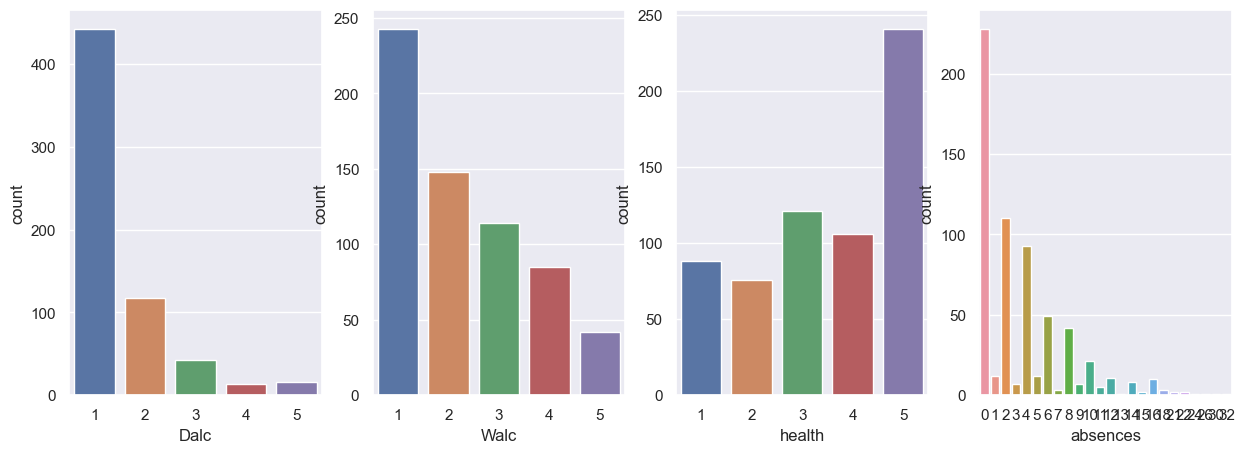

In [139]:
def relationship(dataframe, f, g, h ,i):
    plt.figure(figsize = (15, 5))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 4, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 4, 3)
    sns.countplot(x = df[h])

    plt.subplot(1, 4, 4)
    sns.countplot(x = df[i])


relationship(df,'Dalc','Walc','health','absences')


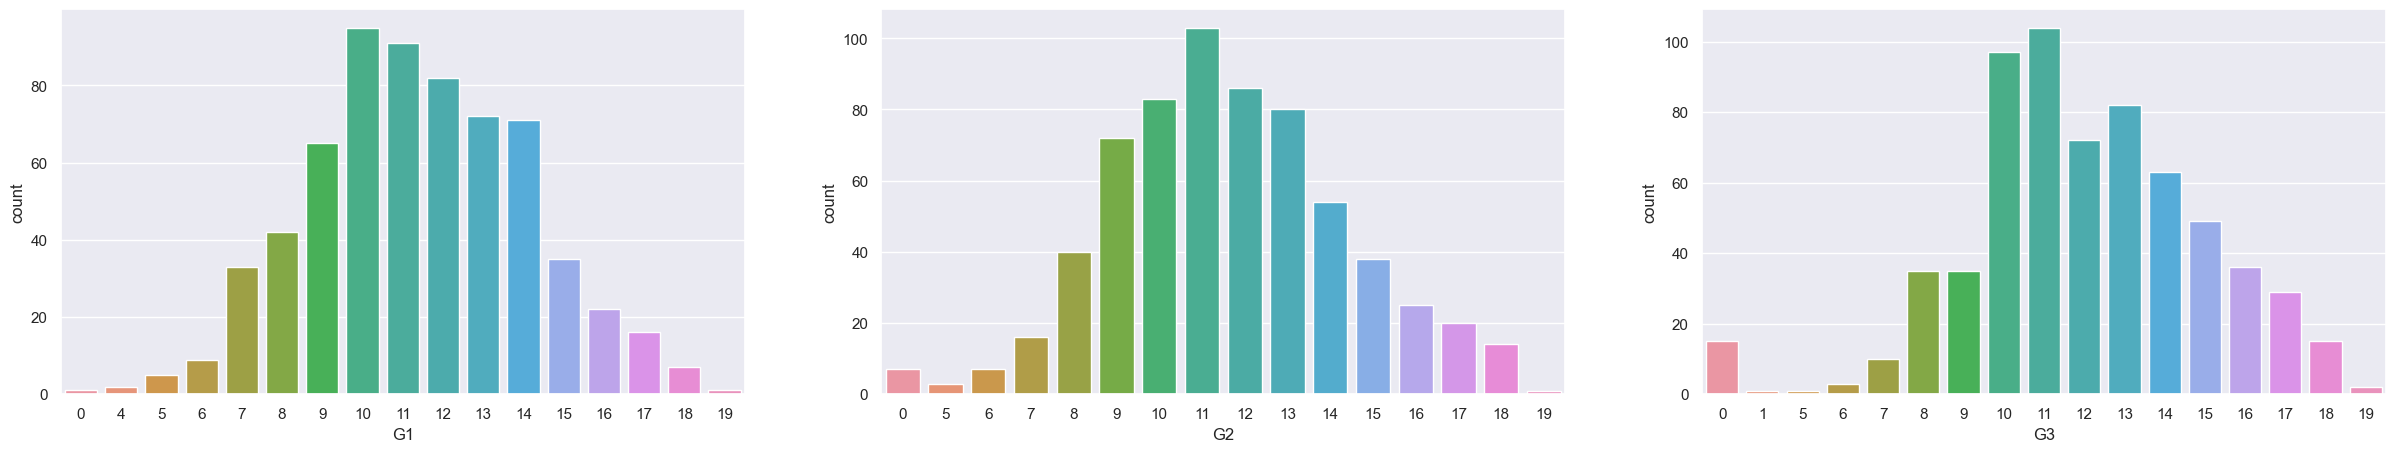

In [147]:
def Linearity(dataframe, f, g, h):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 3, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 3, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 3, 3)

    sns.countplot(x = df[h])

Linearity(data,'G1','G2','G3')

<Axes: xlabel='age', ylabel='count'>

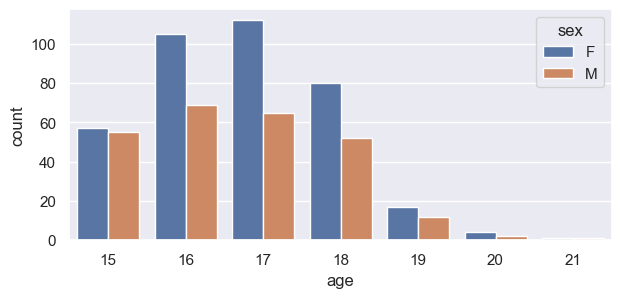

In [141]:
plt.figure(figsize=(7,3))
sns.countplot(x = df['age'], hue = df['sex'] )

More females than males are present

<Axes: xlabel='age', ylabel='absences'>

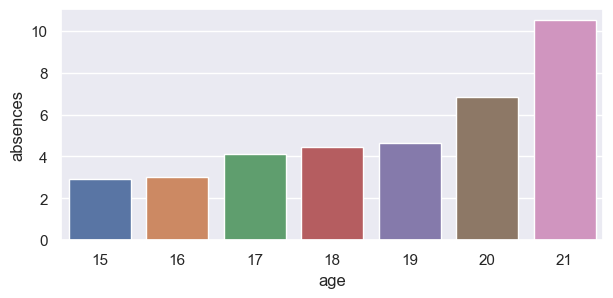

In [142]:
plt.figure(figsize=(7,3))
sns.barplot(x = df['age'], y = df['absences'], ci = 0 )

<ol>
<li>
Students are mostly ages <= to 19 </li>
<li>We can see that the number of female pupils are averagely higher than male</li>
<li>Older student are mostly absence from class</li>
</ol>

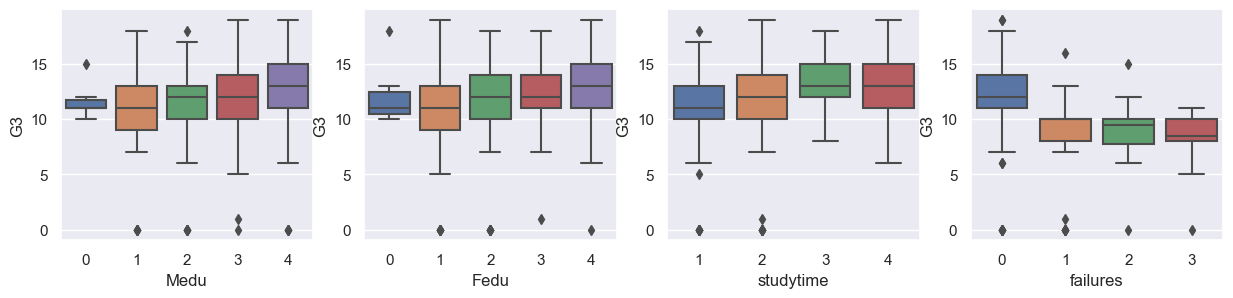

In [148]:
def relationship(dataframe, a, b, c, d):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 4, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 4, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

    plt.subplot(1, 4, 4)
    sns.boxplot(x = df[d], y = df['G3'] )

relationship(df,'Medu', 'Fedu', 'studytime','failures')

<ol>
<li>We see how grades increase as the level of parental education increases</li>
<li>We see how grades most student have not failed a course</li>
</ol>



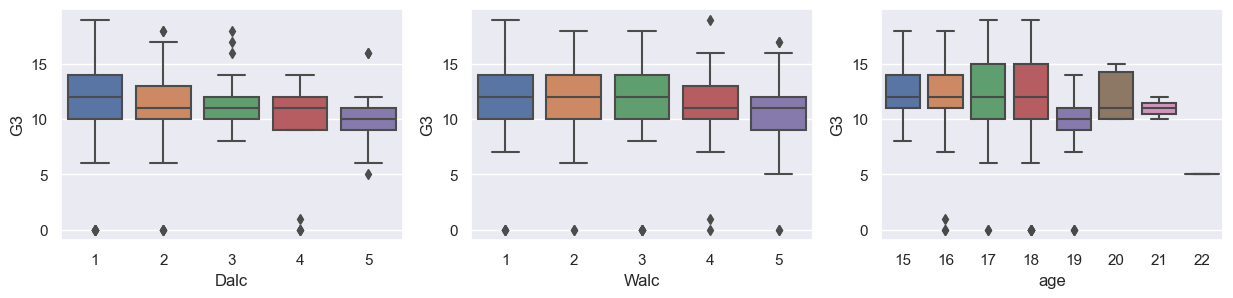

In [149]:
def relationship(dataframe, a, b, c):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

relationship(data,'Dalc', 'Walc', 'age')


<ol>
<li>We can see that in both cases as alcohol consumption increases, grades tend to decrease</li>
<li>We can see that Older student tend to fail and student with the best result are between Ages 18 and 19</li>
</ol>


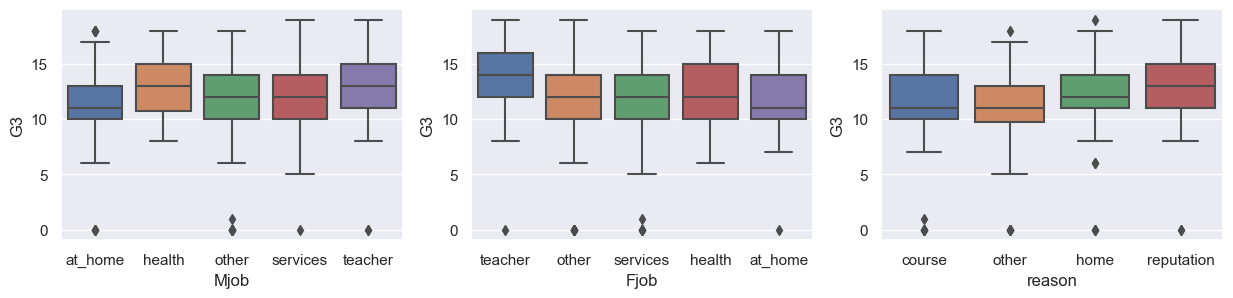

In [150]:
def relationship(dataframe, a, b, c):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

relationship(data,"Mjob", "Fjob", "reason")

<ol>
<li>TMother's and father's work prevails "other"</li>
<li>More students chose the school because of the course of study, others because it was close to home, because of the school's reputation, and a minority for other reasons.</li>
<li>Most students are followed by their mother,few by their father, and other</ol>


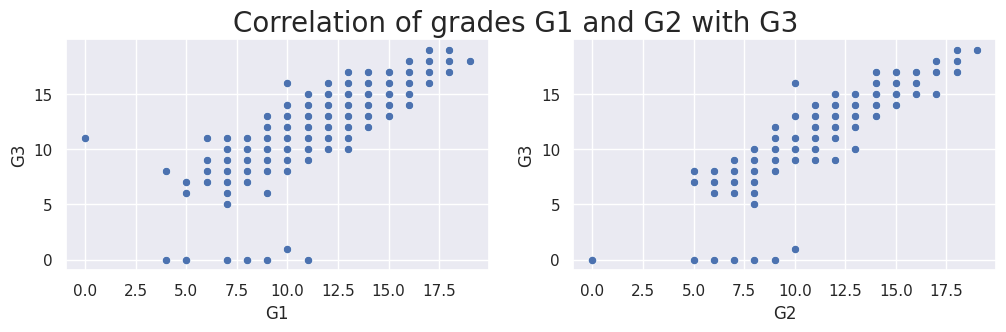

In [134]:
fig = plt.figure(figsize = (12,3))
plt.suptitle("Correlation of grades G1 and G2 with G3", size = 20)
g = gs.GridSpec(nrows = 1, ncols = 2, figure = fig)

ax1 = plt.subplot(g[0,0])
ax1 = sns.scatterplot(data = data, x = data["G1"], y = data["G3"])

ax2 = plt.subplot(g[0,1])
ax2 = sns.scatterplot(data = data, x = data["G2"], y = data["G3"])

<P>
We decided to use G3 as the target variable grade because G1 and G2 have a linear relatioonship with G3
</P>


In [59]:
dx = df.copy()

In [62]:
dx.Target = dx.Target.astype(str)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
normalizing = MinMaxScaler()

for i in dx.columns:
    if dx[i].dtypes != 'O': # --------------- Select the numerical columns
        dx[[i]] = scaler.fit_transform(dx[[i]]) # ------------------------ Tranform the selected the numerical columns

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() # ---------------------------------------------------------- Instantiate encoding library
for i in dx.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if dx[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        dx[i] = lb.fit_transform(dx[i]) # -------------------------------- Transform the selected data.

dx.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Target
0,0,0,1.077161,1,0,0,1.306773,1.523316,0,4,0,1,0.580299,0.068428,-0.356415,1,0,0,0,1,1,0,0,0.073637,-0.160260,0.705348,-0.536968,-0.989888,-0.367958,0.056140,0
1,0,0,0.240839,1,0,1,-1.340280,-1.201407,0,2,0,0,-0.753334,0.068428,-0.356415,0,1,0,0,0,1,1,0,1.131327,-0.160260,-0.156896,-0.536968,-0.989888,-0.367958,-0.373928,0
2,0,0,-1.431803,1,1,1,-1.340280,-1.201407,0,2,2,1,-0.753334,0.068428,-0.356415,1,0,0,0,1,1,1,0,0.073637,-0.160260,-1.019139,0.572064,0.576092,-0.367958,0.486208,0
3,0,0,-1.431803,1,0,1,1.306773,-0.293166,1,3,1,1,-0.753334,1.269714,-0.356415,0,1,0,1,1,1,1,1,-0.984054,-1.115772,-1.019139,-0.536968,-0.989888,1.016264,-0.803996,0
4,0,0,-0.595482,1,0,1,0.424422,0.615075,2,2,1,0,-0.753334,0.068428,-0.356415,0,1,0,0,1,1,0,0,0.073637,-0.160260,-1.019139,-0.536968,-0.206898,1.016264,-0.803996,0


In [64]:
# ANOVA F-value between label/feature

x = dx.drop('Target', axis = 1) # --------------------------------- Define the Independent Variables
y = dx.Target # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
14,failures,66.471070
20,higher,38.992492
0,school,26.829167
6,Medu,26.079654
7,Fedu,16.203277
13,studytime,13.837734
29,absences,11.431216
8,Mjob,10.388793
10,reason,8.852918
2,age,7.858691


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

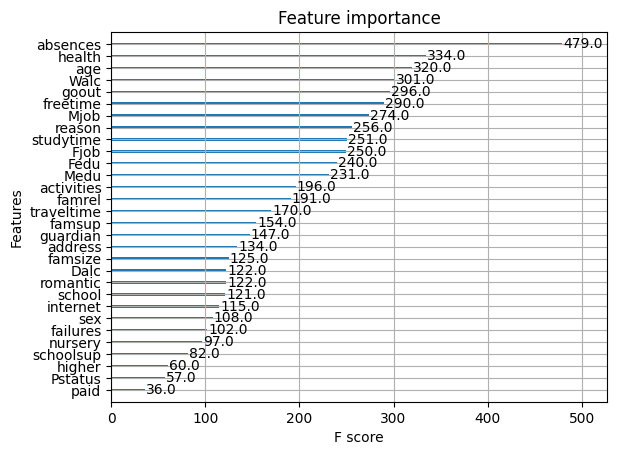

In [66]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [152]:
xtrain.columns

Index(['school', 'higher', 'Dalc', 'Fedu', 'Walc', 'Medu', 'age', 'absences',
       'Mjob', 'failures', 'studytime', 'health', 'goout', 'freetime',
       'reason'],
      dtype='object')

In [168]:
sel_col = ['school', 'higher', 'Dalc', 'Fedu', 'Walc', 'Medu', 'age']
x = dx[sel_col]
y = dx.Target

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 72)
print(f"Xtrain: {xtrain.shape}")
print(f"Xtest: {xtest.shape}")
print(f"ytrain: {ytrain.shape}")
print(f"ytest: {ytest.shape}")

Xtrain: (505, 7)
Xtest: (127, 7)
ytrain: (505,)
ytest: (127,)


In [170]:
dx.Target.value_counts()

Target
0    370
2    180
1     82
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.87      0.62      0.73       408
           1       0.00      0.00      0.00         1
           2       0.38      0.59      0.46        96

    accuracy                           0.62       505
   macro avg       0.42      0.41      0.40       505
weighted avg       0.78      0.62      0.67       505



<Axes: >

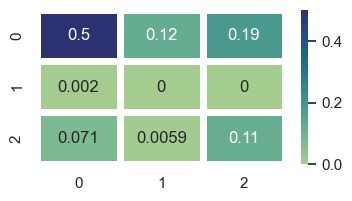

In [171]:
# Modelling
from sklearn.linear_model import LogisticRegression # ---------------------------- Import the algorithm for modelling
log_reg = LogisticRegression() # ------------------------------------------------- Instantiate the algorithm

log_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
ypred = log_reg.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on

print(classification_report(ypred, ytrain)) # ----------------------------- View the classification metrics of the model
revealer = confusion_matrix(ypred, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)# ----------------------------- View the classification metrics of the model


In [172]:
import pickle
#---------------------SAVE MODEL-------------------------
pickle.dump(log_reg, open('Exam_Performance_Model.pkl', "wb"))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       106
           1       0.00      0.00      0.00         0
           2       0.48      0.67      0.56        21

    accuracy                           0.68       127
   macro avg       0.46      0.45      0.45       127
weighted avg       0.84      0.68      0.74       127



<Axes: >

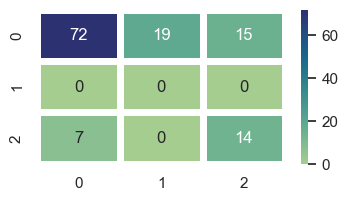

In [173]:
# trying on test data
test_pred = log_reg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer, annot=True, cmap='crest', linewidth=5)